# E2a: Küchentischversuch zum Laval-Rotor

Name:  Philipp Schmidt
Datum:  11.1.23

## Forschungsfrage

Wie genau arbeitet der gestellte sehr einfache Beschleunigungssensor, gibt es Frequenzen die er nicht aufnehmen kann, wie ist der Vergleich seines Rauschens zu seiner Sensitivität. Dafür sollen zwei Geräte mit sehr unterschiedlichem Schwingungsverhalten vermessen werden, eine Massagepistole mit sehr niedrigen und starken Schwingungen und eine High Tech Musikbox deren Subwoofer gegenläufig arbeiten um Schwingungen zu reduzieren.

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Für den ersten Versuch wird die Musikbox vermessen, dazu wird der Sensor fest auf dieser festgeklebt und an den PI angeschlossen, danach wird jene eingeschaltet und die Messung kurz vorm Drop des Liedes Radioactive von Imagine Dragons, dieses wird mit einer Lautstärke von etwa 100dB abgespielt, gestartet.


<img src="figures/IMG_3766.jpg" width="500">
<img src="figures/IMG_3764.jpg" width="500">

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [82]:
import h5py as h5
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [86]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/Versuch_MBox/data_20240112_151635_PhilippSchmidt_MBox.h5" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240112_151635_PhilippSchmidt_MBox.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [87]:
#"""Prepare Metadata"""
#(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
#    path_measurement_folder
#)

#print(json.dumps(setup_json_dict, indent=2, default=str))
#print(json.dumps(sensor_settings_dict, indent=2, default=str))
#print("Probe: {}".format(probe_name))
#with open("measurement_data/versuch_sitztanz/1ee9f128-9770-68f2-895c-0d7863c4c14c.json") as jf:
#    g = json.load(jf)
#    name = g['probe']['name']
#    print(name)

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [88]:
with h5.File("measurement_data/Versuch_MBox/data_20240112_151635_PhilippSchmidt_MBox.h5") as f:

    h5_data_x_axis = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_x"]
    h5_data_y_axis = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_y"]
    h5_data_z_axis = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_z"]
    h5_data_time = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp"]
    
    #safe in arrays for plotting
    acc_x_array = np.array(h5_data_x_axis)
    acc_y_array = np.array(h5_data_y_axis)
    acc_z_array = np.array(h5_data_z_axis)
    time_array = np.array(h5_data_time)

    print("Shape of acc_x_array:", acc_x_array.shape)
    print("Shape of acc_y_array:", acc_y_array.shape)
    print("Shape of acc_z_array:", acc_z_array.shape)
    print("Shape of time_array:", time_array.shape)
    print(acc_x_array, 'm/s²')
    print(acc_y_array, 'm/s²')
    print(acc_z_array, 'm/s²')
    print(time_array, 's')


Shape of acc_x_array: (8659,)
Shape of acc_y_array: (8659,)
Shape of acc_z_array: (8659,)
Shape of time_array: (8659,)
[0.7060788 0.7060788 0.7060788 ... 0.7060788 0.7060788 0.7060788] m/s²
[-0.196133 -0.196133 -0.196133 ... -0.196133 -0.196133 -0.196133] m/s²
[11.179581  11.179581  11.179581  ... 11.1403544 11.1403544 11.1403544] m/s²
[1.15847588e-03 3.50832939e-03 5.88154793e-03 ... 1.99949012e+01
 1.99969728e+01 1.99990149e+01] s


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [89]:
acc_magnitude_array = np.sqrt(acc_x_array**2 + acc_y_array**2 + acc_z_array**2)
print("Shape of acc_magnitude_array:", acc_magnitude_array.shape)
print(acc_magnitude_array)

Shape of acc_magnitude_array: (8659,)
[11.20357295 11.20357295 11.20357295 ... 11.16443064 11.16443064
 11.16443064]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0.5, 1.0, 'Beschleunigung Sitztanz Versuch')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


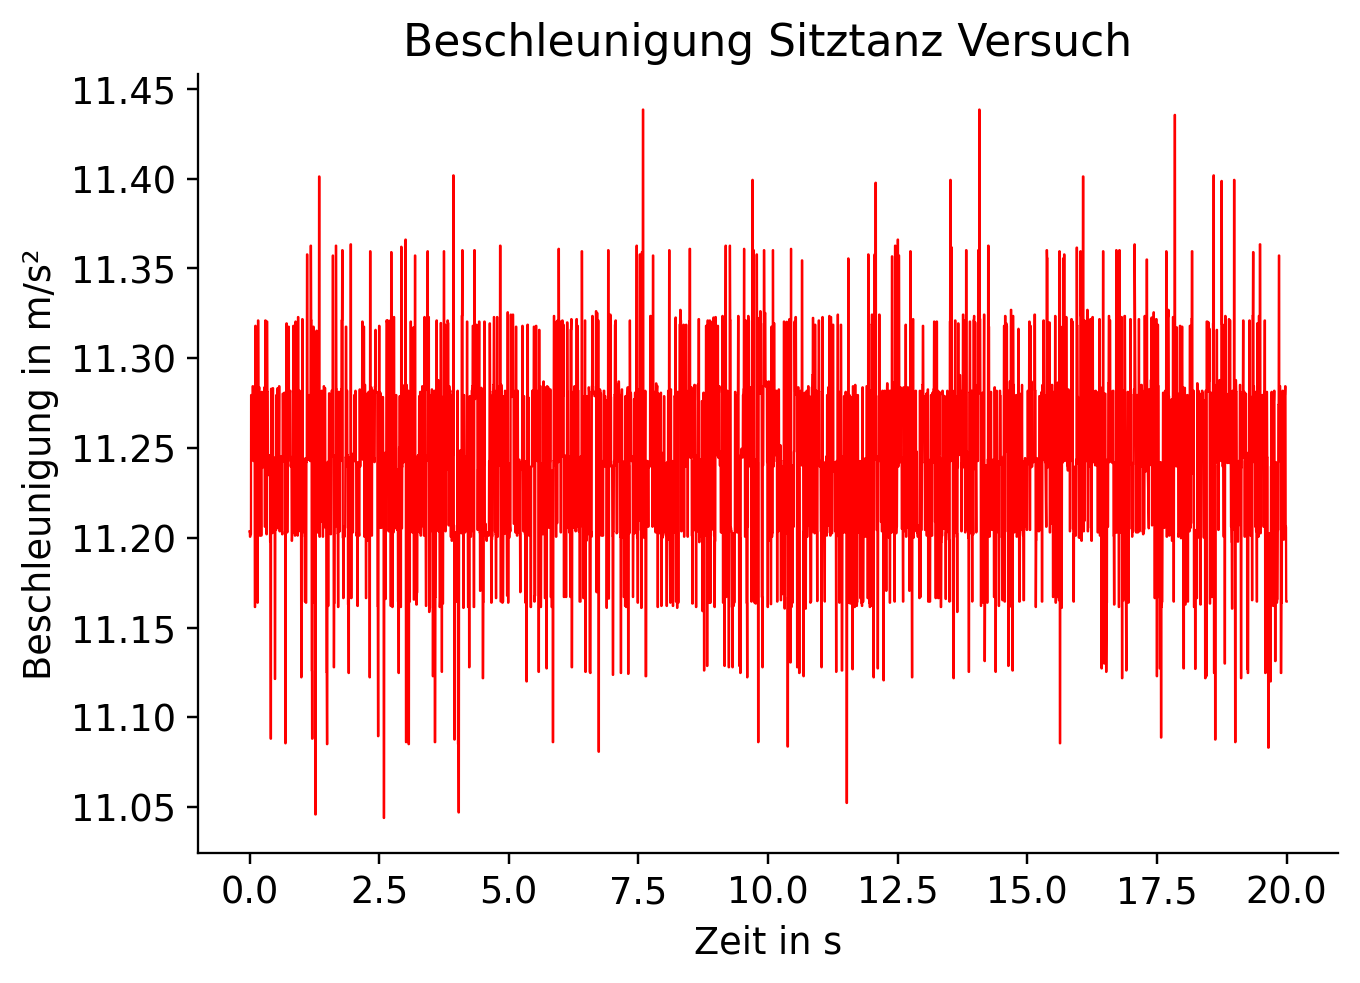

In [90]:
plt.plot(time_array, acc_magnitude_array, color='red')
plt.xlabel("Zeit in s")
plt.ylabel("Beschleunigung in m/s²")
plt.title("Beschleunigung Sitztanz Versuch")

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

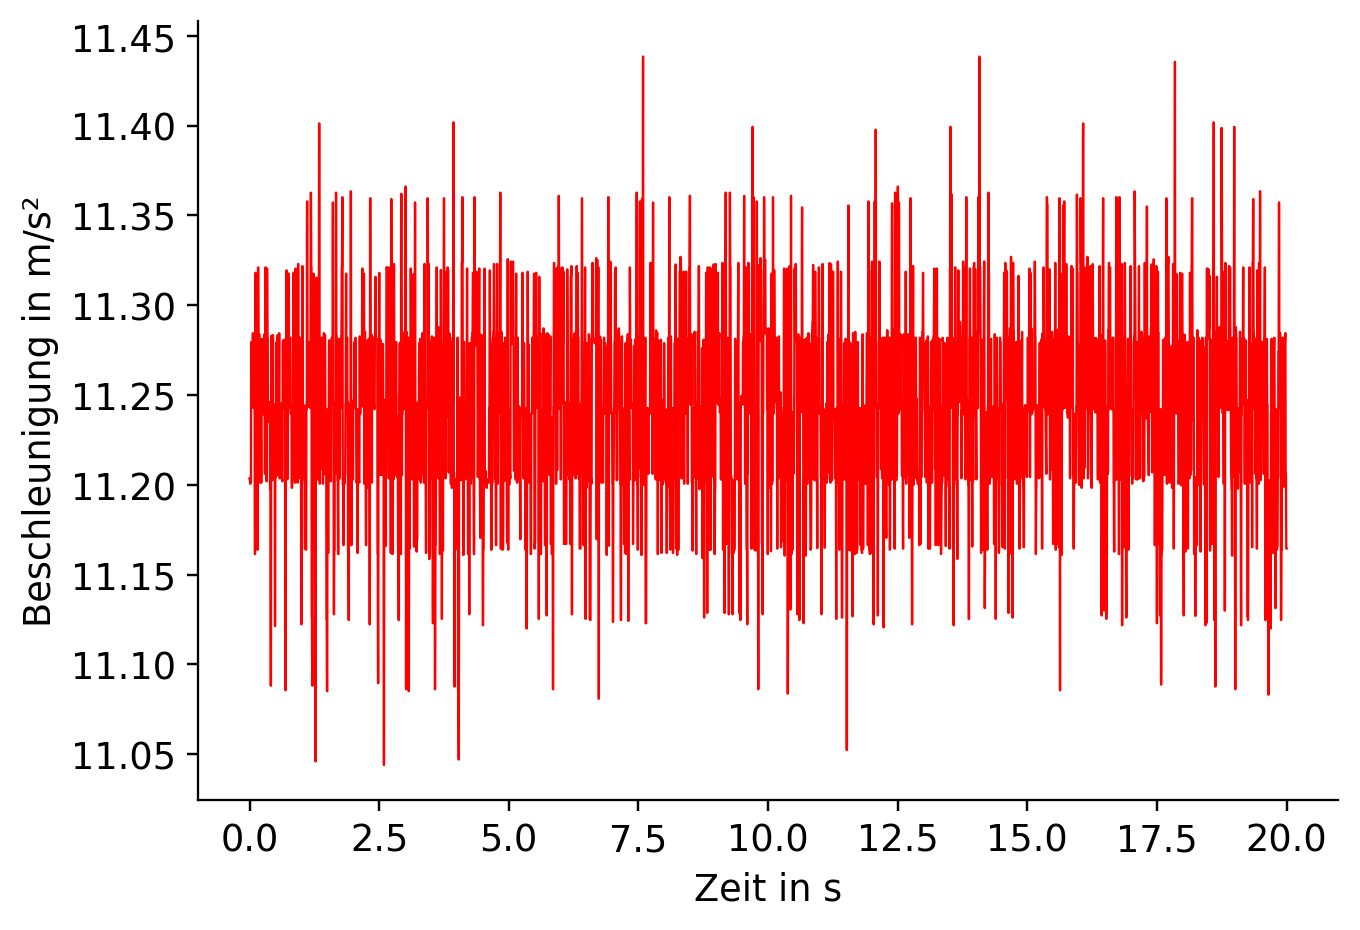

In [91]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
def fft_and_plot(time, acceleration_magnitude, plot_color='red'):
    # Perform FFT
    sr = len(time)
    X = np.fft.fft(acceleration_magnitude)
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T
    freq = freq[1:]
    X = X[1:]

    # Get the one-sided spectrum
    n_oneside = N // 2
    freq = freq[:n_oneside]
    amp = np.abs(X[:n_oneside])

    # Plot the FFT amplitude and frequency
    plt.plot(freq, amp, color=plot_color)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FFT Amplitude')
    plt.title('Frequency Spectrum')
    plt.grid(True)
    plt.show()

# Example usage:
fft_and_plot(interp_points_array, acc_magnitude_interp, plot_color='red')

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

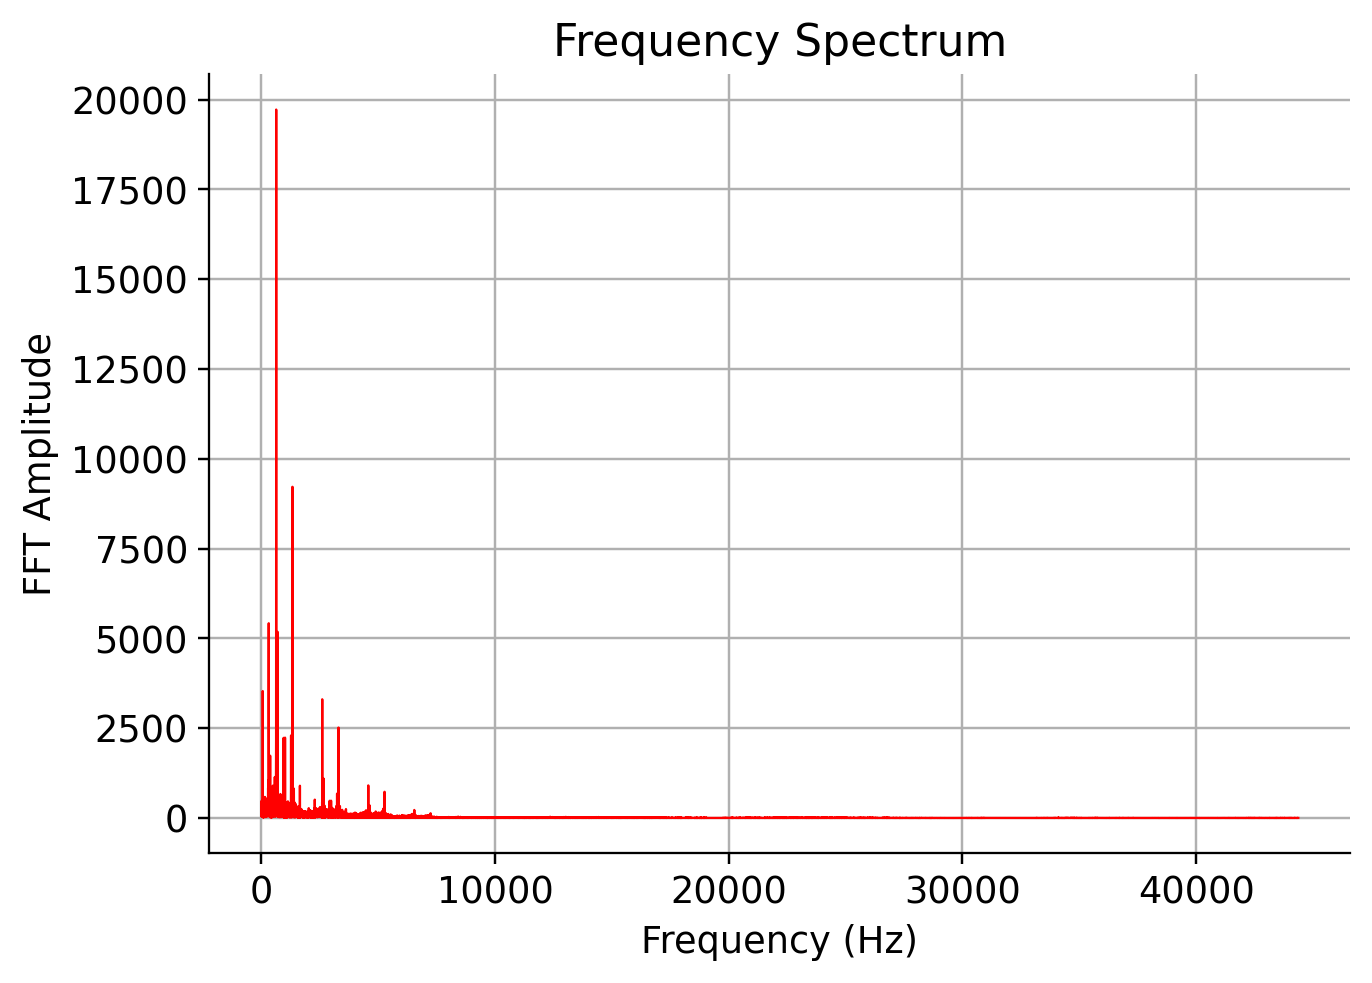

In [101]:
def fft_and_plot(time, acceleration_magnitude, plot_color='red'):
    # Perform FFT
    sr = len(time)
    X = np.fft.fft(acceleration_magnitude)
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T
    freq = freq[1:]
    X = X[1:]

    # Get the one-sided spectrum
    n_oneside = N // 2
    freq = freq[:n_oneside]
    amp = np.abs(X[:n_oneside])

    # Plot the FFT amplitude and frequency
    plt.plot(freq, amp, color=plot_color)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FFT Amplitude')
    plt.title('Frequency Spectrum')
    plt.grid(True)
    plt.show()

# Example usage:
fft_and_plot(interp_points_array, acc_magnitude_interp, plot_color='red')

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Der Aufbau ist gleih zum ersten Versuch nur dass diesesmal der Sensor auf der Massagepistole aufgeklebt ist und die gestartet wird bevor die Messsung startet.

<img src="figures/IMG_3766.jpg" width="500">
<img src="figures/IMG_3764.jpg" width="500">


## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [102]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/Versuch_massagegun/data_20240112_152336_PhilippSchmidt_massagegun.h5" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240112_152336_PhilippSchmidt_massagegun.h5" # replace None by the filename of the hdf5-file

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [103]:
with h5.File("measurement_data/Versuch_massagegun/data_20240112_152336_PhilippSchmidt_massagegun.h5") as f:

    h5_data_x_axis = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_x"]
    h5_data_y_axis = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_y"]
    h5_data_z_axis = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_z"]
    h5_data_time = f["/RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp"]
    
    #safe in arrays for plotting
    acc_x_array = np.array(h5_data_x_axis)
    acc_y_array = np.array(h5_data_y_axis)
    acc_z_array = np.array(h5_data_z_axis)
    time_array = np.array(h5_data_time)

    print("Shape of acc_x_array:", acc_x_array.shape)
    print("Shape of acc_y_array:", acc_y_array.shape)
    print("Shape of acc_z_array:", acc_z_array.shape)
    print("Shape of time_array:", time_array.shape)
    print(acc_x_array, 'm/s²')
    print(acc_y_array, 'm/s²')
    print(acc_z_array, 'm/s²')
    print(time_array, 's')

Shape of acc_x_array: (8874,)
Shape of acc_y_array: (8874,)
Shape of acc_z_array: (8874,)
Shape of time_array: (8874,)
[ 4.8248718  4.8248718  4.8248718 ... -0.0392266 -0.0392266 -5.88399  ] m/s²
[ 0.6276256  0.6276256  0.6276256 ... -0.4314926 -0.4314926 -2.0005566] m/s²
[11.2188076 11.2188076 11.2188076 ... 11.1403544 11.1403544 11.2972608] m/s²
[1.12318993e-03 3.36027145e-03 5.56850433e-03 ... 1.99964356e+01
 1.99986739e+01 2.00019875e+01] s


#### 2. Betrag der Beschleunigung berechnen


In [104]:
acc_magnitude_array = np.sqrt(acc_x_array**2 + acc_y_array**2 + acc_z_array**2)
print("Shape of acc_magnitude_array:", acc_magnitude_array.shape)
print(acc_magnitude_array)

Shape of acc_magnitude_array: (8874,)
[12.22844821 12.22844821 12.22844821 ... 11.14877665 11.14877665
 12.89386159]


#### 3. Darstellung der Messdaten

Text(0.5, 1.0, 'Beschleunigung Sitztanz Versuch')

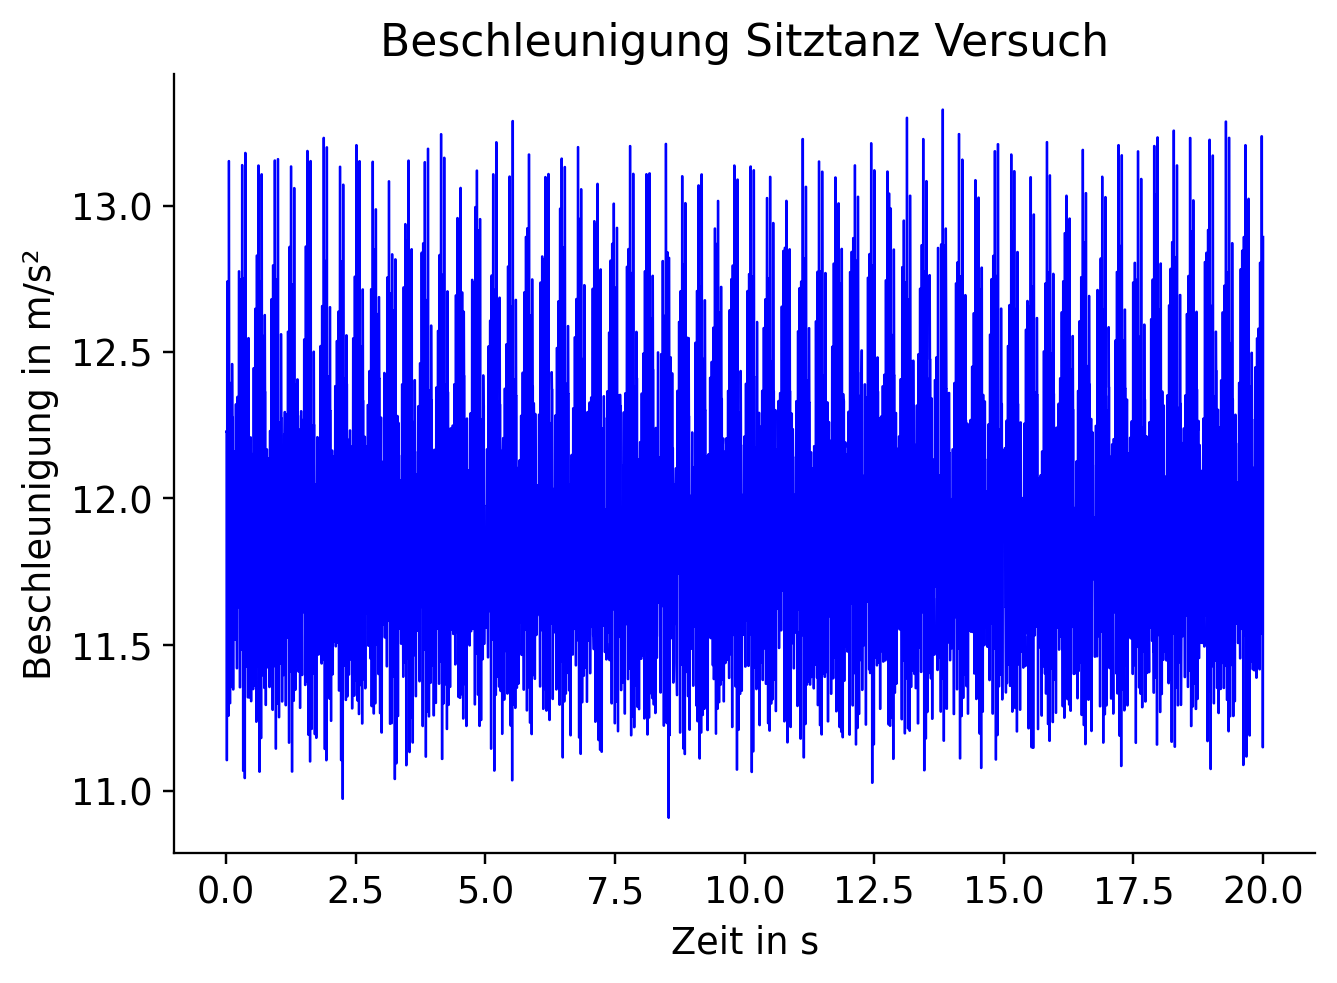

In [105]:
plt.plot(time_array, acc_magnitude_array, color='blue')
plt.xlabel("Zeit in s")
plt.ylabel("Beschleunigung in m/s²")
plt.title("Beschleunigung Sitztanz Versuch")

#### 4. Interpolation der Messwerte



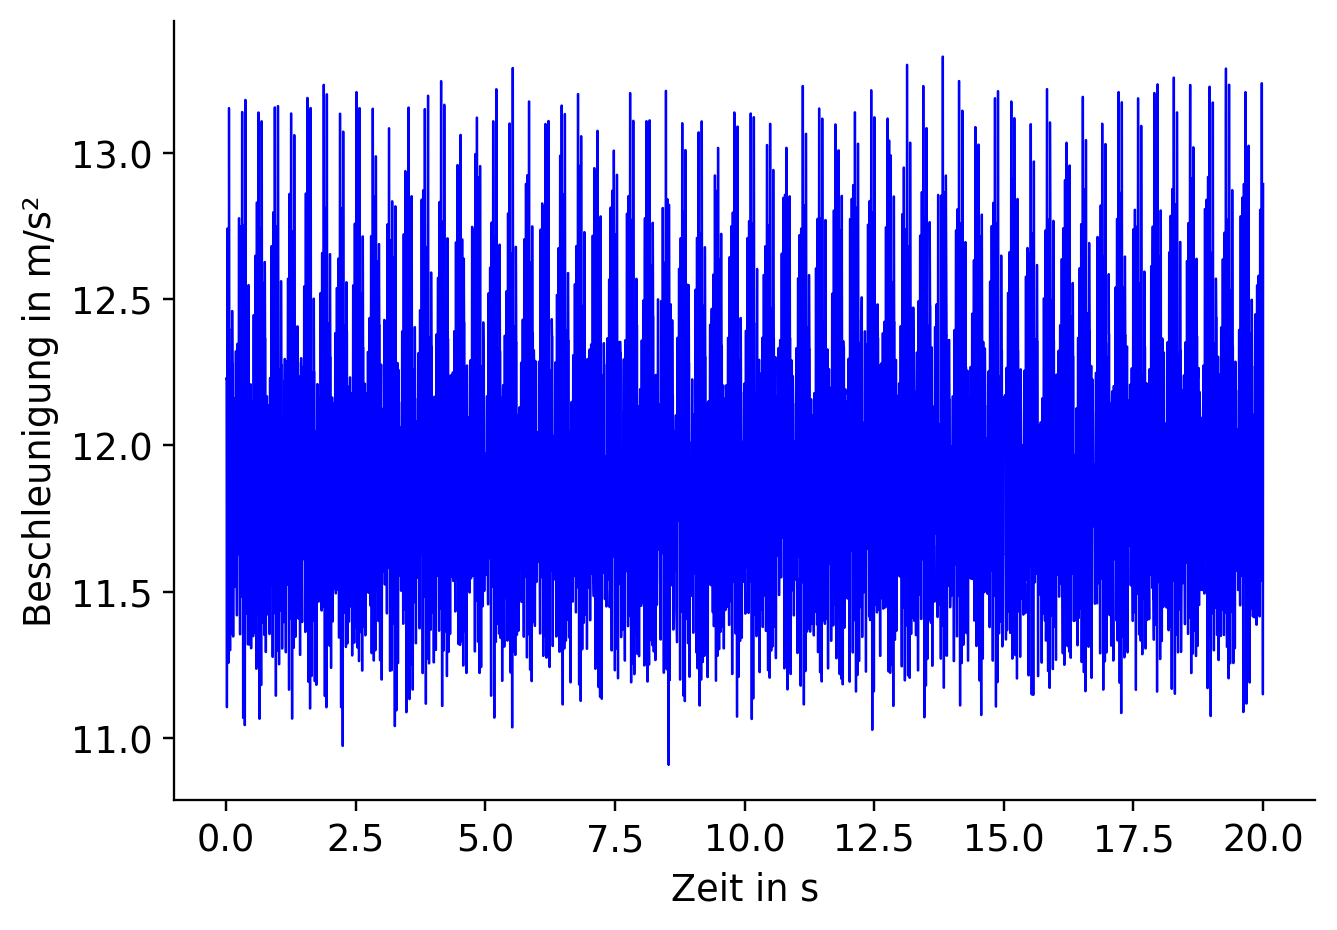

In [106]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
interp_points_array, acc_magnitude_interp = linear_interpolation(time_array, acc_magnitude_array)

min_length = min(len(interp_points_array), len(acc_magnitude_interp))
interp_points_array = interp_points_array[:min_length]
acc_magnitude_interp = acc_magnitude_interp[:min_length]

plt.plot(interp_points_array, acc_magnitude_interp, color='blue')
plt.xlabel("Zeit in s")
plt.ylabel("Beschleunigung in m/s²")
plt.show()


#### 5 & 6. FFT durchführen und graphisch darstellen


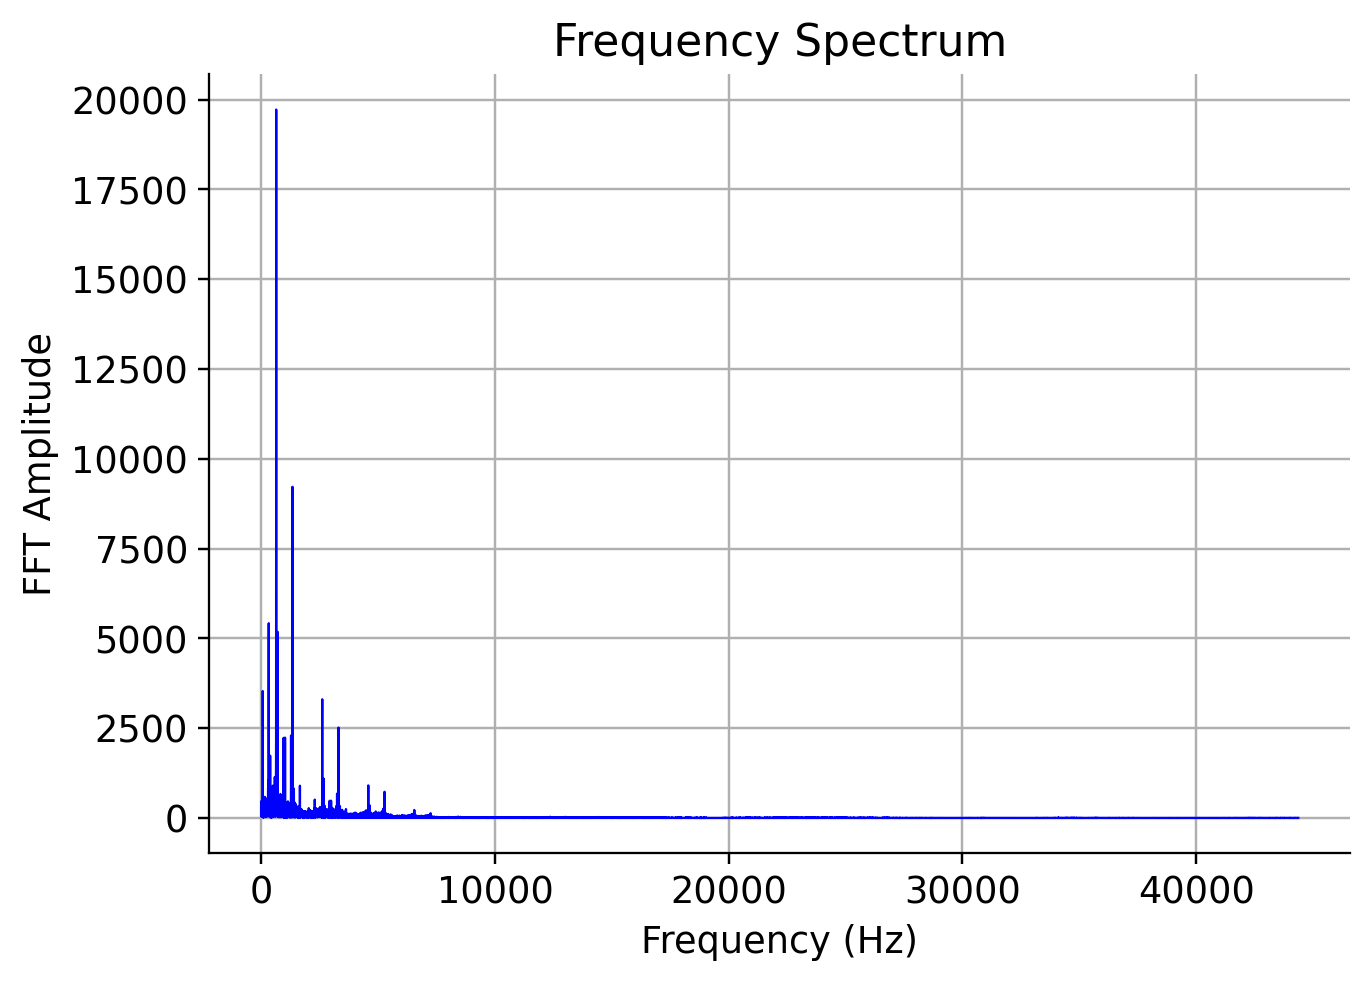

In [107]:
def fft_and_plot(time, acceleration_magnitude, plot_color='red'):
    # Perform FFT
    sr = len(time)
    X = np.fft.fft(acceleration_magnitude)
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T
    freq = freq[1:]
    X = X[1:]

    # Get the one-sided spectrum
    n_oneside = N // 2
    freq = freq[:n_oneside]
    amp = np.abs(X[:n_oneside])

    # Plot the FFT amplitude and frequency
    plt.plot(freq, amp, color=plot_color)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FFT Amplitude')
    plt.title('Frequency Spectrum')
    plt.grid(True)
    plt.show()

# Example usage:
fft_and_plot(interp_points_array, acc_magnitude_interp, plot_color='blue')

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Beide Ergebnisse scheinen plausibl, die bei der Massagepistole erwartbaren nidrigen Frequenzen des Massagekopfes sind deutlich zu sehen, wie höheren Frequenzen stammen vermutlich aus der inneren Mechanik der Mschine. Bei der Musikbox fallen die Frequenzen des Mittleltöners besonders auf, während die Frequenzen des Bassbereichs nur sehr schwach sind. In beiden fällen leigt wie zu erwarten viel Rauschen vor.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der Beschleunigungssensor hat meiner Intuition entsprechend funktiniert, den sinn von der Datei m_postprocessing.py habe ich nicht ganz verstanden, da es hier im Notebook mir einfacher Erschien habe ich sie Weggelassen.